# Introduction & Questions

In this project, I demonstrate the 'Data Analysis Process' on a public dataset from Kaggle (https://www.kaggle.com/joniarroba/noshowappointments).

The dataset contains information about medical appointments in Brazil.

The project seeks to uncover relationships between the attributes of the patients and the likelihood of them showing up for their scheduled appointment. This is a descriptive analysis.

What factors are related to not showing up for appointments? I investigate the following:

1) Is there a relationship between gender and no shows?
2) Is there a relationship between being on welfare (participation in a public assistance program) and no shows?
3) Is there a relationship between gender, welfare program particpation, and no shows?
4) is there a relationship between gender, age, and no shows?

In this analysis, the dependent variable is 'no show' and the independent variables are gender (male or female) and welfare program participation (scholarship status).


# Data Wrangling

In [1]:
#import packages and assign aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data into memory
# note that you could download data from https://www.kaggle.com/joniarroba/noshowappointments or link with API
# set up correct directory
df=pd.read_csv("/Users/user/Downloads/noshowappointments-kagglev2-may-2016.csv")

# I view the raw data with the 'head()' command.
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

The dataset has 110,527 observation and 14 variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


None of the observations have any missing values for the 14 variables. This is evidenced by the fact the the number of non-null observations for each variable (column) is equal to the total number of observations

In [5]:
# Change the variables for the 'Scheduled Day' and 'Appointment Day' to datetime.
pd.to_datetime(df['ScheduledDay']);
pd.to_datetime(df['AppointmentDay']);

In [6]:
# Rename mis-spelled columns 
# Rename the 'No-show' column/variable with an underscore, 'No_show', so that I can use in inline with certain commands. 
df=df.rename(columns={'Hipertension': 'Hypertension', 'Handcap' : 'Handicap', 'No-show': "No_show"})
# Lower case all columns.
df.columns = map(str.lower, df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hypertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handicap        110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Change no show and gender to binary variables
df['no_show'].replace(('Yes', 'No'), (1, 0), inplace=True)
df['gender'].replace(('M', 'F'), (1, 0), inplace=True)
df=df.rename(columns={'gender': "male"})

Changing no-show to binary allows me to take the mean to find the percent of the respective group that is a 'no show' rather than having to create the proportion of the group (count of group that 'no show' relative to total)

In [8]:
# Check for unique
df.nunique()

patientid          62299
appointmentid     110527
male                   2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
dtype: int64

There are 62,299 unique patients in the dataset. Therefore, there are some observations represent multiple visits from the same patient.

In [9]:
# check for duplicates in the data
sum(df.duplicated())

0

There are no duplicates in the dataset

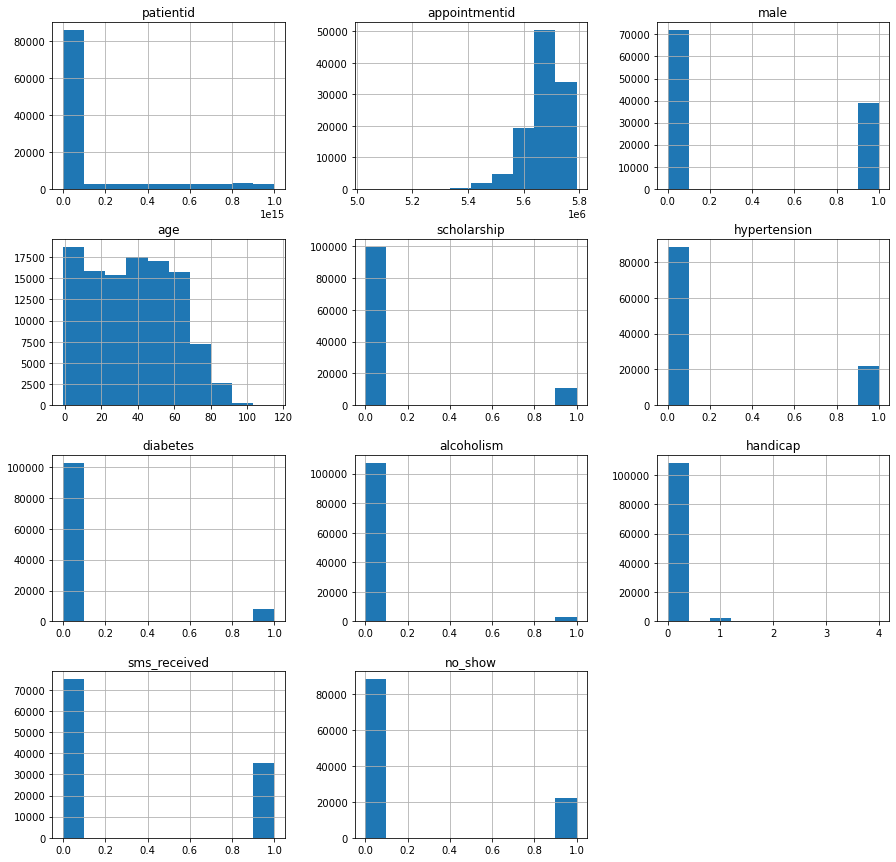

In [10]:
df.hist(figsize=(15,15));

The histograms suggest that:

1) most patients are female
2) most patients are in good health (with respect to hypertension, alcoholism, diabetes, and general handicaps)
3) a minority of patients receive a sms text message
    

# Exploratory Data Analysis

In [11]:
df.no_show.mean()

0.20193255946510807

On average, about 1 in every 5 appointments results in a 'no show'

In [12]:
def tab(col_name):
    #this take a column, and separates with '|'
    tab = df[col_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    tab = pd.Series(tab.split('|'))
    
    #The result will be in descending order so that the first element is the most frequently-occurring element.
    frequency = tab.value_counts(ascending = False)
    
    return frequency

I create a user written function to divide column values and tabulate them. I use it below to tabulate the appointments by neighbourhood and appointment day.

In [13]:
hood = tab('neighbourhood')

hood.head(10)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
dtype: int64

There are 81 neighbourhoods that appointments in this dataset are made from. We can see that many of the appointments come from the top 10 neighborhoods. Below I examine the bottom 10 neighborhoods.

In [14]:
hood.tail(10)

UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
dtype: int64

Relative to the top 10 neighborhoods, barely any appointments are made for the bottom 10. 

In [15]:
day=tab('appointmentday')
day

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
dtype: int64

This dataset has 27 different appointment days. All days have at least 3000 appointments besides 2016-05-14 where only 39 appointments were recorded. This may be an error in the dataset. 

In [16]:
# I check if there is a difference between the genders for no shows.
# Use query to select each group and get its mean quality
male = df.query('male ==1')
female = df.query('male ==0')

mean_noshow_male = male['no_show'].mean()
mean_noshow_female = female['no_show'].mean()

count_noshow_male=male['no_show'].count()
count_noshow_female=female['no_show'].count()

print(str(format(mean_noshow_male*100,"0.2f")) 
      + ' percent of Males do not show up for their appointments while ' 
      + str(format(mean_noshow_female*100,"0.2f")) 
      + ' percent of females do not show')


19.97 percent of Males do not show up for their appointments while 20.31 percent of females do not show


In [17]:
df.male.mean()

0.35002307128574917

There is a very small difference between the percent of males and females missing appointments in the total sample. However, only 35 percent of the all appointments are for male patients so a greater proportion of the absolute amount of no shows are for females.

### Visual representation of the data

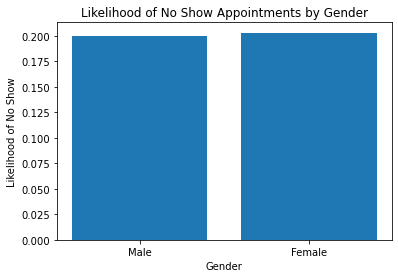

In [18]:
# I create a bar chart with of the likelihood of a No Show by gender
locations = [1, 2]
heights = [mean_noshow_male, mean_noshow_female]
labels = ['Male', 'Female']
plt.bar(locations, heights, tick_label=labels)
plt.title('Likelihood of No Show Appointments by Gender')
plt.xlabel('Gender')
plt.ylabel('Likelihood of No Show');

The likelihood of missing an appointment appears to be almost the same for the genders.

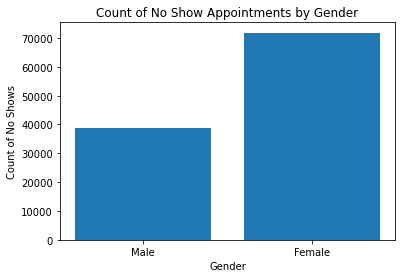

In [19]:
# I create a bar chart with proper labels
locations = [1, 2]
heights = [count_noshow_male, count_noshow_female]
labels = ['Male', 'Female']
plt.bar(locations, heights, tick_label=labels)
plt.title('Count of No Show Appointments by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of No Shows');

There are many money females missing appointments than males in an absolute sense. However, as seen in the previous figure, both genders are almost just as likely to miss an appointment.

In [20]:
# I check if Are Scholarship (welfare) recipients less likely to show up for an appointment?
# Query to select each group and get its mean quality
scholarship = df.query('scholarship ==1')
no_scholarship = df.query('scholarship ==0')

mean_noshow_sch = scholarship['no_show'].mean()
mean_noshow_nosch = no_scholarship['no_show'].mean()

count_noshow_sch = scholarship['no_show'].count()
count_noshow_nosch = no_scholarship['no_show'].count()

print(str(format(mean_noshow_sch*100,"0.2f")) 
      + ' percent of scholarship recipients do not show up for their appointments while ' 
      + str(format(mean_noshow_nosch*100,"0.2f")) 
      + ' percent of non-scholarship patients do not show. '
     'Scholarships are awarded to poor families. There may be transportation issues ' 
      + 'leading to more no shows, or there may be issues with reliability of the '
      + 'patients due to moral hazard (no having to bear the cost themselves).')


23.74 percent of scholarship recipients do not show up for their appointments while 19.81 percent of non-scholarship patients do not show. Scholarships are awarded to poor families. There may be transportation issues leading to more no shows, or there may be issues with reliability of the patients due to moral hazard (no having to bear the cost themselves).


In [21]:
print('However, only ' 
      + str(format(df['scholarship'].mean()*100,"0.2f")) 
      + ' percent of the total patient population are on scholarship' 
      + ' so they are not driving the majority of no shows.')


However, only 9.83 percent of the total patient population are on scholarship so they are not driving the majority of no shows.


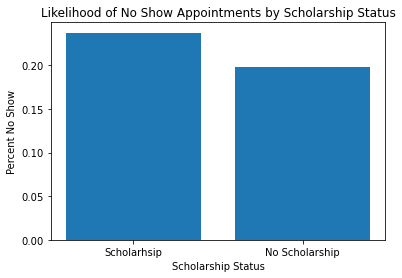

In [22]:
# I create a bar chart on average likelihood of missed appointment by scholarship status
locations = [1, 2]
heights = [mean_noshow_sch, mean_noshow_nosch]
labels = ['Scholarhsip', 'No Scholarship']
plt.bar(locations, heights, tick_label=labels)
plt.title('Likelihood of No Show Appointments by Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Percent No Show');

Scholarship recipients are more likely to not show up for their appointments relative to non-scholarship recipients.

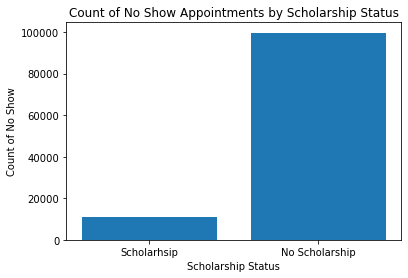

In [23]:
# I create a bar chart on counts of no shows by scholarship status
locations = [1, 2]
heights = [count_noshow_sch, count_noshow_nosch]
labels = ['Scholarhsip', 'No Scholarship']
plt.bar(locations, heights, tick_label=labels)
plt.title('Count of No Show Appointments by Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Count of No Show');

There are many more no show appointments among the no scholarship group. This is because scholarship recipients account for only 10% of the total appointments in the dataset.

Is there a relationship between gender, welfare particpation, and no shows?

In [24]:
# I check if there is a relationship between gender, welfare particpation, and no shows.

# Query to select each group by scholarship status and gender to creat four subset dataframes
df_male_sch=df.query('scholarship==1 & male==1')
df_female_sch=df.query('scholarship==1 & male==0')

df_male_nosch=df.query('scholarship==0 & male==1')
df_female_nosch=df.query('scholarship==0 & male==0')


# I create four subset dataframes using the query function above.
# Compute the means of each respective df
mean_noshow_male_sch=df_male_sch.no_show.mean()

mean_noshow_female_sch=df_female_sch.no_show.mean()

mean_noshow_male_nosch=df_male_nosch.no_show.mean()

mean_noshow_female_nosch=df_male_nosch.no_show.mean()

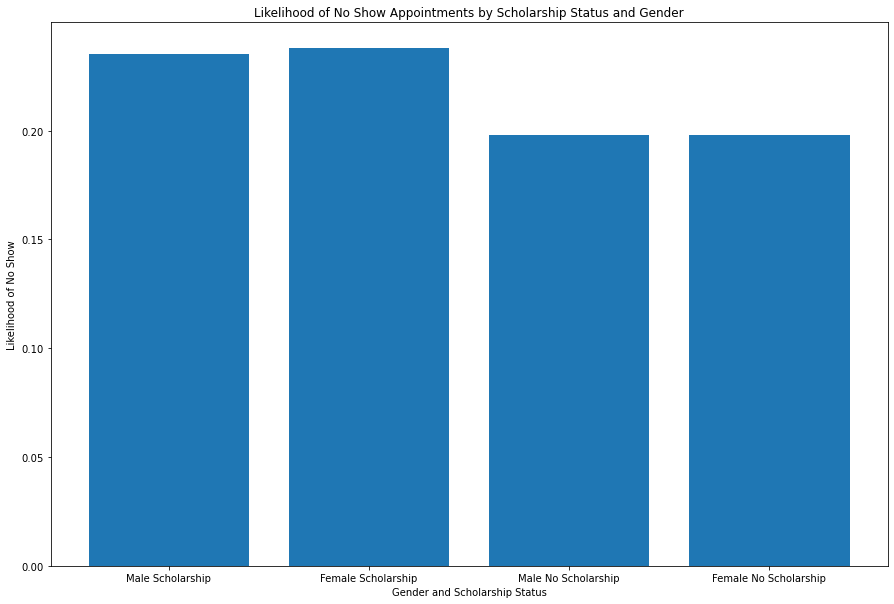

In [26]:
# Create a bar chart showing the likelihood of no show by gender and scholarship status
locations = [1, 2, 3, 4]
heights = [mean_noshow_male_sch, mean_noshow_female_sch, 
           mean_noshow_male_nosch, mean_noshow_female_nosch]
labels = ['Male Scholarship', 'Female Scholarship', 'Male No Scholarship', 'Female No Scholarship']
plt.bar(locations, heights, tick_label=labels)
plt.title('Likelihood of No Show Appointments by Scholarship Status and Gender')
plt.xlabel('Gender and Scholarship Status')
plt.ylabel('Likelihood of No Show')
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig;

Females on Scholarship are most likely to miss their appointments relative to all others. Male scholarship recipients are more likely to miss their appointment than either gender with no scholarship. There is not a visually distinguishable difference between the genders and the likelihood of missing an appointment for the no scholarship group.

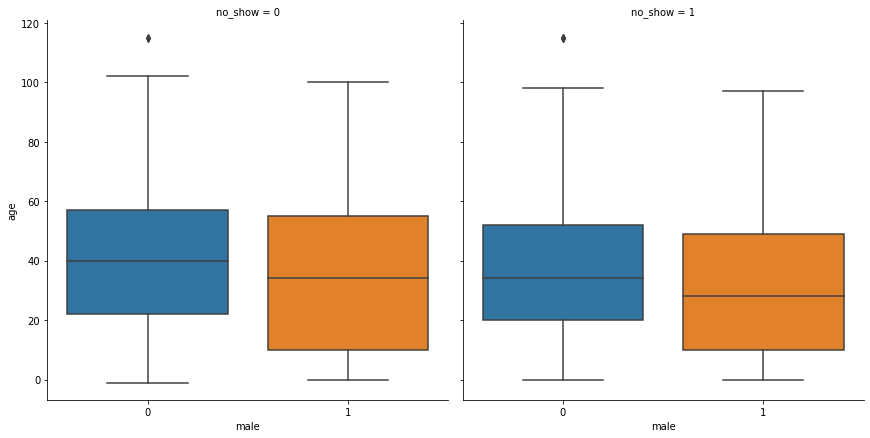

In [27]:
# Using seaborn, I create multi-dimension box plot figure with gender, age, and no show.
sns.catplot(x="male", y="age", col="no_show", data=df, height=6, kind="box" )

I add additional dimensions to the analysis by considering if there is a relationship between age, gender, and the likelihood of not showing up for an appointment. The figure above shows (in blue boxes) that females tend to be older regardless of not showing up for the appointment. However, younger females are more likely not to show. This trend of younger individuals being less likely to show up is consistent with both genders.

# Conclusion and Limitation

This project explored the Kaggle Brazilian medical appointment dataset and attempted to uncover relationships between gender, welfare program participation, and the likelihood of missing an appointment. 

The data was loaded into python and standard data procedures were performed such as: 
1) searching for missing values
2) searching for duplicated rows of data
3) reformatting variables and
4) renaming columns

The exploratory data analysis focused on the gender, scholarship status (welfare receipt), and the likelihood of missing an appointment.

Only about 35 percent of appointments were for males, and only 10 percent of appointments were for scholarship recipients. However, the most likely type of individuals to miss appointments were female scholarship recipients. 

A limitation of this analysis was that it was only descriptive. Some of the mean statistics in this analysis appear to be very close numbers. This analysis could be improved by conducting 't-testing' to formally find out if there exists a statistically significant different in the mean among these groups.
